In [506]:
from fbprophet import Prophet
from dateutil.parser import parse
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


%matplotlib inline



data_path = "C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Data\\cbt.csv"
data_path2 = "C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Data\\gmail_df.csv"
data_path_write = 'C:\\Users\\Henry\\Documents\\405-DataScience\\G_Suite_Metrics\\data\\Gmail\\Time_predictions_on_all_columns\\'
fa = pd.read_csv(data_path)
entire_dataset = pd.read_csv(data_path2)

Generalized code for time predictions.

In [507]:

def timeprediction123(df, csvfilename):
    p = Prophet(weekly_seasonality=True)
    df = df.rename(columns={df.columns[0]: "ds", df.columns[1]: "y"})
    
    df['ds'] = pd.to_datetime(df['ds'], utc=True)
    df['ds']= df.ds.dt.date
    df.index.freq = 'D'
    #df['cap'] = df['y'].max() + 50
    #df['floor'] = 0
    df['y'] = np.log(df['y'])
    
    p.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
    future = p.make_future_dataframe(periods=365)
    #future['cap'] = df['y'].max() + 50
    #future['floor'] = 0
    time_pred = p.predict(future)
    
    
    df1 = time_pred[['ds','yhat']]
    
    df1.to_csv(data_path_write + csvfilename)
    df2 = time_pred[['yhat']]
    
    return df1,df2,time_pred
    

Makes a prediction for all columns in gmail

In [508]:
e[e.columns[0]].max()

421672.3860938244

In [509]:
df_with_all_preds = timeprediction123(df = entire_dataset[['time', entire_dataset.columns[1]]], csvfilename = entire_dataset.columns[1] + '_time_prediction.csv')[0]
df_with_all_preds = df_with_all_preds.rename(columns= {df_with_all_preds.columns[0] : "time", df_with_all_preds.columns[1] : entire_dataset.columns[1]})
entire_dataset= entire_dataset.drop(columns= [entire_dataset.columns[1]])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [517]:
for x in range(len(entire_dataset.columns) - 1):
    h =timeprediction123(df = entire_dataset[['time', entire_dataset.columns[x+1]]], csvfilename = entire_dataset.columns[x+1] + '_time_prediction.csv')[0]
    h =h.rename(columns = {h.columns[0]: "time", h.columns[1] : entire_dataset.columns[x+1]})
    df_with_all_preds =  df_with_all_preds.merge(h, on = "time")

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


KeyboardInterrupt: 

In [511]:
df_with_all_preds

,time,1day_active_users,1day_imap_users,1day_pop_users,1day_webmail_users,30day_active_users,30day_imap_users,30day_pop_users,30day_webmail_users,7day_active_users,...,inbound_non_spam_emails,inbound_rejected_emails,inbound_rerouted_emails,inbound_spam_emails,inbound_unencrypted_emails,outbound_delivered_emails,outbound_encrypted_emails,outbound_rejected_emails,outbound_rerouted_emails,outbound_unencrypted_emails
0,2015-03-23,19575.227116,10270.361618,222.894272,11495.607095,22940.242344,12025.495108,272.073621,20383.562306,21555.091951,...,197121.306611,16427.089383,5461.715129,57315.833356,145728.349661,6521.805389,20211.906737,555.769363,14914.062018,923.722571
1,2015-03-24,20135.975392,10401.313277,222.755414,11908.870437,23317.636032,12153.226598,272.343638,20686.726142,21952.689404,...,204109.960780,18287.759415,5425.830124,64324.722956,152595.972947,6710.165593,20674.912716,543.088853,14807.571502,952.347231
2,2015-03-25,19934.009973,10384.046498,221.615201,11755.944704,23161.925510,12133.749850,271.230044,20671.371251,21840.395847,...,200840.110277,17836.451942,5350.039188,62873.394482,150592.586201,6465.315299,20370.073417,550.371718,14663.589781,920.943714
3,2015-03-26,19742.342263,10389.278782,220.610006,11468.658909,23190.535239,12132.518584,270.074827,20685.781649,21916.918561,...,195829.289303,16751.760499,5299.581370,62584.334132,148240.799857,5984.538047,19644.677496,557.043356,14547.646302,900.256427
4,2015-03-27,19060.406985,10393.745509,219.527582,10459.570268,23387.200550,12232.222949,270.461941,20864.589735,22117.845479,...,171439.964351,15013.913272,5199.814659,54657.903839,138861.587403,4677.444826,17129.073135,521.872979,14394.288187,759.953420
5,2015-03-28,15854.071973,10387.235235,218.372612,7884.304132,23799.722591,12403.693365,269.477288,21206.990650,22578.369803,...,110105.706835,9861.518681,4998.330404,38265.523168,112407.444378,440.334964,9739.698500,426.821331,14170.697003,252.050911
6,2015-03-29,16987.101615,10610.161434,218.800056,9230.259377,24099.626556,12523.159601,269.561709,21448.345577,22900.348318,...,118460.527336,10424.051253,4994.415083,39637.841471,116004.653197,842.901633,10667.171861,435.115561,14170.080874,239.961419
7,2015-03-30,20939.279352,10911.328491,219.968518,12667.258729,24458.274784,12661.607734,269.483253,21830.113100,23228.846174,...,203366.050878,17791.100133,5119.805485,58029.025601,148341.235436,6410.457348,20870.730834,566.491818,14439.379411,835.974198
8,2015-03-31,21350.339140,11005.485209,219.798884,12972.283533,24783.949511,12758.427073,269.583384,22106.361543,23544.825899,...,209258.751683,19643.953226,5091.862413,65181.298970,154946.597041,6588.531216,21245.933287,550.390551,14340.427785,873.877039
9,2015-04-01,20987.394474,10945.378500,218.632424,12703.056846,24563.264501,12702.442076,268.310532,22049.698282,23331.479772,...,204866.211607,19176.554532,5019.860882,63886.723470,152674.605176,6336.923856,20844.500357,553.907369,14191.716088,853.671296


In [512]:
hey = entire_dataset[['time','inbound_rejected_emails']].copy()

In [513]:
hey['time'] = pd.to_datetime(hey['time'], utc = True)
#e['time']= df.time.dt.date
hey.index.freq = 'D'
hey = hey.set_index('time')

In [514]:
shid = df_with_all_preds[['time','inbound_rejected_emails']].copy()

In [515]:
shid['time'] = pd.to_datetime(shid['time'], utc = True)
#e['time']= df.time.dt.date
shid.index.freq = 'D'
shid = shid.set_index('time')

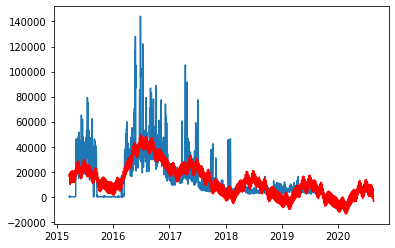

In [516]:
plt.plot(hey)
plt.plot(shid, color = "red")

In [395]:
e = e.rename(columns={df.columns[0]: "ds", df.columns[1]: "y"})

In [396]:
heyman = timeprediction123(e, "cbt")[2]

In [419]:
e['time'] = pd.to_datetime(e['time'], utc = True)
#e['time']= df.time.dt.date
e.index.freq = 'D'
e = e.set_index('time')

Everything below is testing the time prediction analysis

In [470]:
fa['day'] = pd.to_datetime(fa['day'])
fa['day']= fa.day.dt.date
fa.index.freq = 'D'
fa1 = fa.copy()

In [36]:
fa1['day'] = pd.to_datetime(fa1['day'])
fa1['day']= fa1.day.dt.date
fa1.index.freq = 'D'

In [37]:
#columns has to be renamed to this in order for it to work. Keep the default index
df_new = fa.rename(columns={"day": "ds", "emails_received": "y"})

In [39]:
m = Prophet(daily_seasonality=True)
m.fit(df_new)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = m.make_future_dataframe(periods=365)
e = m.predict(future)

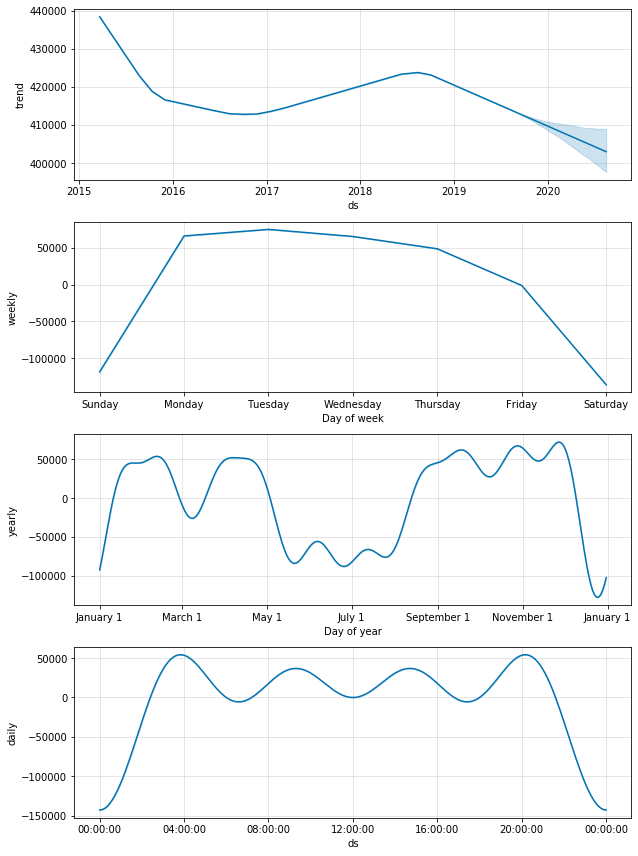

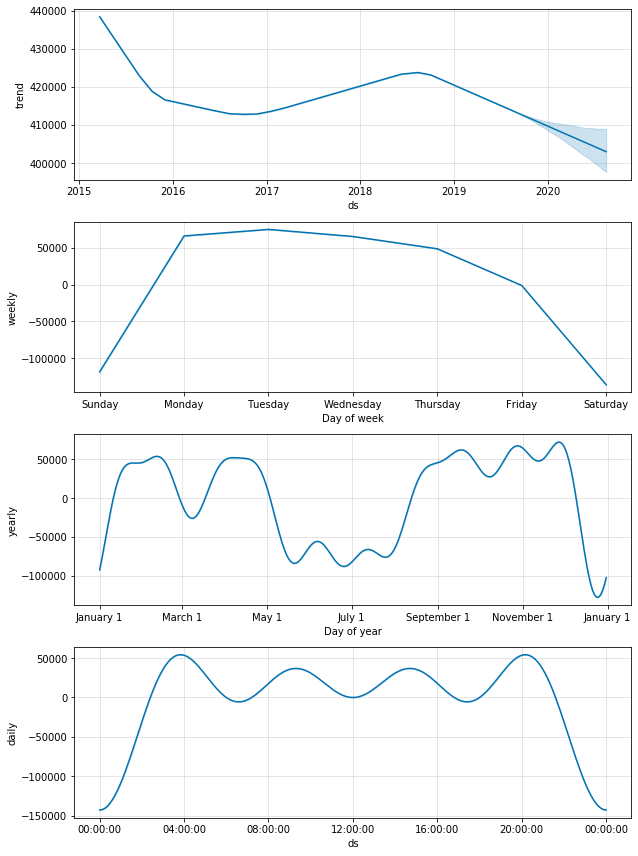

In [40]:
m.plot_components(e)

In [42]:
x = e[['ds','yhat']].copy()

In [43]:
x['ds'] = pd.to_datetime(x['ds'])
#x['ds']= fa.day.dt.date
x.set_index('ds', inplace=True)
#fa.index.freq = 'D'

In [465]:
e['time'] = pd.to_datetime(e['time'])
#x['ds']= fa.day.dt.date
e.set_index('time', inplace=True)
#fa.index.freq = 'D'

In [45]:
fa.set_index('day', inplace=True)

Red is emails received and blue is the prediction

In [ ]:
fa = fa.set_index('day')

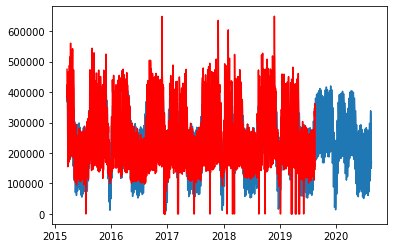

In [479]:

plt.plot(e)
plt.plot(fa, color = "red")

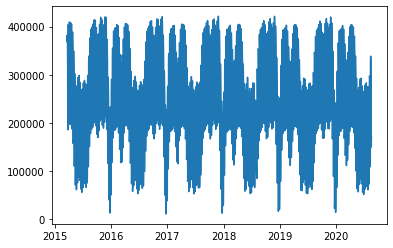

In [480]:
plt.plot(e)

Making a train and test. There is no need to do this, just trying to see if it a good fit

In [55]:
train, test = fa1.iloc[:1268], fa1.iloc[1268:]
#train = train.asfreq('D')
#test = test.asfreq('D')

In [58]:
df_new1 = train.rename(columns={"day": "ds", "emails_received": "y"})

In [82]:
m1 = Prophet(daily_seasonality=True)
m1.fit(df_new1)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future1 = m1.make_future_dataframe(periods=317)
e1 = m1.predict(future1)

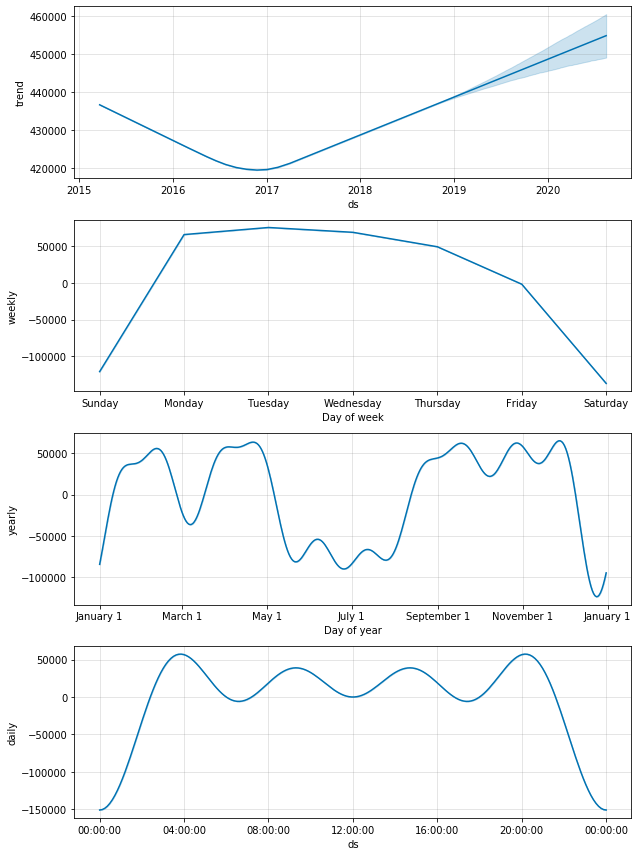

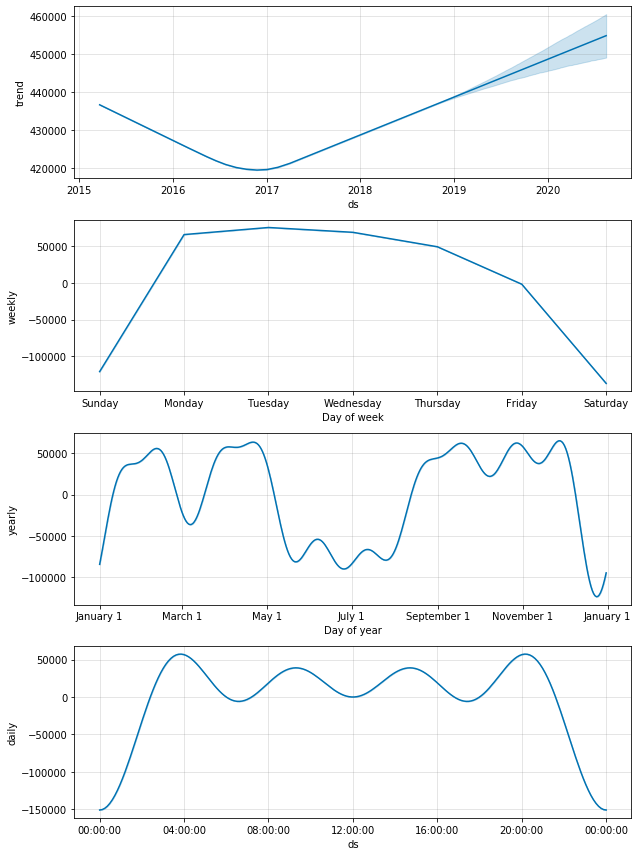

In [83]:
m1.plot_components(e1)

In [84]:
x1 = e1[['ds','yhat']].copy()

In [86]:
x1['ds'] = pd.to_datetime(x1['ds'])
#x['ds']= fa.day.dt.date
x1.set_index('ds', inplace=True)
#fa.index.freq = 'D'

In [ ]:
test['day'] = pd.to_datetime(test['day'])
#x['ds']= fa.day.dt.date
test.set_index('day', inplace=True)
#fa.index.freq = 'D'

In [73]:
train['day'] = pd.to_datetime(train['day'])
#x['ds']= fa.day.dt.date
train.set_index('day', inplace=True)

C:\Users\Henry\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Looks like a good fit

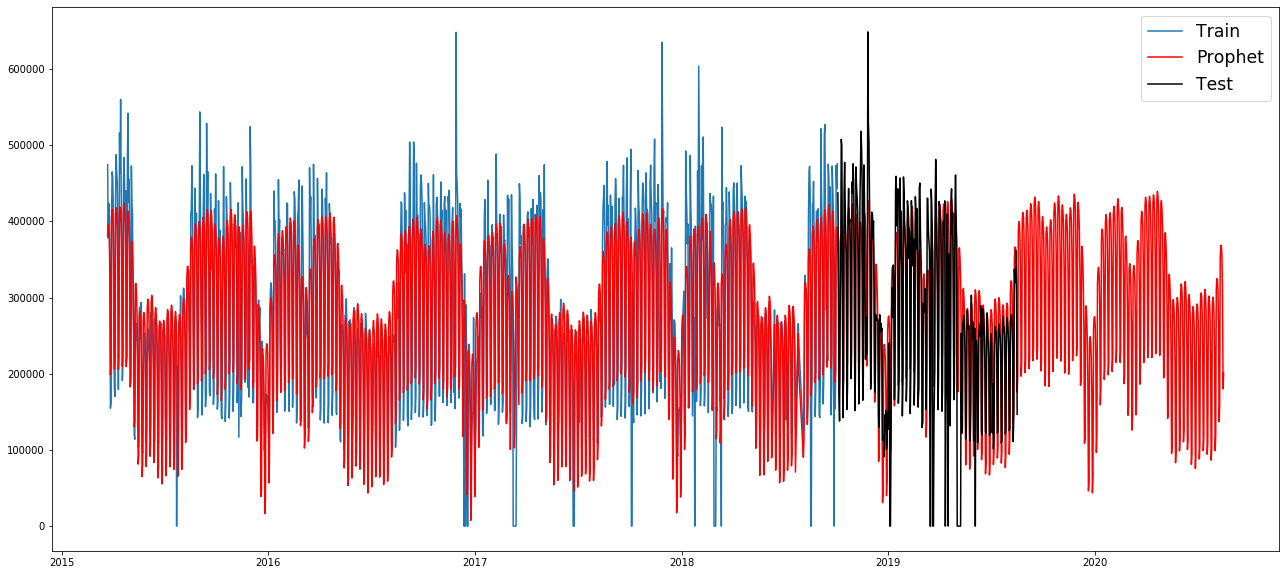

In [87]:
plt.figure(figsize=(22, 10))
plt.plot(train.index, train, label='Train')
plt.plot(x1.index, x1, label='Prophet', color='r')
plt.plot(test.index, test, label='Test', color='k')
plt.legend(loc='best', fontsize='xx-large')
plt.show()